<a href="https://colab.research.google.com/github/ZhanyangZhuSD/UCSD_ML/blob/main/Ensembles_Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

test - [https://www.kaggle.com/code/kashnitsky/topic-5-ensembles-part-1-bagging/notebook]


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
from matplotlib import pyplot as plt

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [2]:
from google.colab import files
from os.path import exists

selectedFile = 'telecom_churn.csv'
file_not_exists = not exists(selectedFile)
if file_not_exists:
  uploaded = files.upload()
file_not_exists = not exists(selectedFile)
if file_not_exists: 
  print("Upload this file: ", selectedFile)
else:
  print("File is ready to read: ", selectedFile)

Saving telecom_churn.csv to telecom_churn.csv
File is ready to read:  telecom_churn.csv


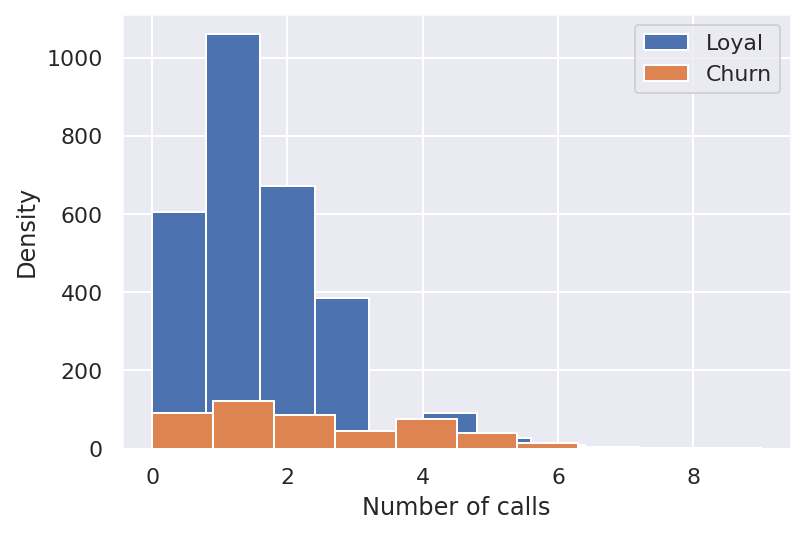

In [3]:
telecom_data = pd.read_csv(selectedFile)

telecom_data.loc[telecom_data["Churn"] == False, "Customer service calls"].hist(
    label="Loyal"
)
telecom_data.loc[telecom_data["Churn"] == True, "Customer service calls"].hist(
    label="Churn"
)
plt.xlabel("Number of calls")
plt.ylabel("Density")
plt.legend();


In [4]:
telecom_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [11]:
def get_bootstrap_samples(data, n_samples):
    """Generate bootstrap samples using the bootstrap method."""
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    # print(samples)
    # print( "  ")
    # print(samples.shape)
    # print(type(samples))
    return samples


def stat_intervals(stat, alpha):
    """Produce an interval estimate."""
    boundaries = np.percentile(stat, [100 * alpha / 2.0, 100 * (1 - alpha / 2.0)])
    return boundaries


# Save the data about the loyal and former customers to split the dataset
loyal_calls = telecom_data.loc[
    telecom_data["Churn"] == False, "Customer service calls"
].values
churn_calls = telecom_data.loc[
    telecom_data["Churn"] == True, "Customer service calls"
].values

# Set the seed for reproducibility of the results
np.random.seed(0)

# Generate the samples using bootstrapping and calculate the mean for each of them
loyal_mean_scores = [
    np.mean(sample) for sample in get_bootstrap_samples(loyal_calls, 1000)
]
churn_mean_scores = [
    np.mean(sample) for sample in get_bootstrap_samples(churn_calls, 1000)
]

# Print the resulting interval estimates
print(
    "Service calls from loyal: mean interval", stat_intervals(loyal_mean_scores, 0.05)
)
print(
    "Service calls from churn: mean interval", stat_intervals(churn_mean_scores, 0.05)
)

Service calls from loyal: mean interval [1.4077193  1.49473684]
Service calls from churn: mean interval [2.0621118  2.39761905]
